Fase 1: Preparación y Exploración Inicial
Revisión de los datos proporcionados

Inspecciona el archivo de datos para familiarizarte con las columnas, formato y estructura.
Carga los datos en un Jupyter Notebook utilizando Pandas.
Haz un resumen básico de las columnas (tipos de datos, valores únicos, tamaños, etc.).

Análisis Exploratorio de Datos (EDA)

Calcula estadísticas descriptivas (media, mediana, desviación estándar).
Crea visualizaciones iniciales: histogramas, gráficos de barras y boxplots para identificar patrones y posibles outliers.
Identifica distribuciones temporales si hay columnas de fechas (e.g., cuándo se realizaron adelantos o pagos).
Análisis de la Calidad de Datos 

Identifica valores faltantes, duplicados e inconsistencias.
Documenta los problemas encontrados y las estrategias de limpieza necesarias.


Fase 2: Limpieza y Preprocesamiento de los Datos
Limpieza de datos

Corrige o elimina datos faltantes, duplicados y valores fuera de rango.
Estandariza formatos de columnas clave, como fechas o categorías.
Creación de cohortes

Define cohortes basadas en la fecha del primer adelanto de efectivo. Agrúpalas según el año/mes/trimestre.


Fase 3: Análisis de Métricas
Cálculo de métricas iniciales

Frecuencia de uso del servicio: Calcula el promedio de uso por usuario y cohorte a lo largo del tiempo.
Tasa de incidentes: Determina qué porcentaje de transacciones presentan problemas por cohorte.
Ingresos generados: Agrega los ingresos por cohorte y analiza la evolución.
Métricas acumuladas: Define y calcula métricas adicionales (como ingresos acumulados por usuario).
Visualización de métricas

Crea gráficos para mostrar la evolución temporal de cada métrica en cada cohorte.
Utiliza gráficos de líneas, heatmaps o diagramas de dispersión según sea necesario.


Fase 4: Modelado Avanzado
Modelos de regresión

Diseña modelos para predecir métricas clave, como ingresos futuros o tasas de uso.
Realiza la búsqueda de hiperparámetros e interpreta los resultados.
Crea visualizaciones, como gráficos de residuos y comparaciones entre predicciones y valores reales.
Modelos de clasificación

Segmenta usuarios según patrones de comportamiento (e.g., usuarios recurrentes vs. esporádicos).
Entrena modelos para clasificar usuarios con base en métricas relevantes.


Fase 5: Documentación y Presentación
Informe del EDA y Calidad de Datos

Resume los hallazgos y acciones tomadas durante el EDA y la limpieza en formato markdown.
Informe de Insights y Modelos

Documenta los insights clave obtenidos de las métricas y el análisis de cohortes.
Explica los modelos creados, sus parámetros y la interpretación de los resultados.
Repositorio GitHub

Organiza el código, datos y documentación en un repositorio estructurado.
Crea un README con los puntos clave del análisis.
Presentación ejecutiva

Diseña una presentación corta y clara con los insights y propuestas más relevantes para los stakeholders.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1-
import pandas as pd

# archivo cashrequest.csv
ruta_archivo = './cashrequest.csv'
datos = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(datos.describe())
# Lista de columnas del DataFrame
print(datos.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())




#comprobar si la cantidad porcentual o fija de comisión depende del tipo de la misma y de la cantidad del préstamo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [100]:
# EDA
# Lista de columnas de fechas
columnas_fechas = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 'reco_last_update'
]

# Conversión a datetime
for columna in columnas_fechas:
    datos[columna] = pd.to_datetime(datos[columna], errors='coerce')

# Extraemos características temporales
datos['mes_creacion'] = datos['created_at'].dt.month
datos['año_creacion'] = datos['created_at'].dt.year

# Verificamos la distribución por años y meses
print(datos['año_creacion'].value_counts())
print(datos['mes_creacion'].value_counts())

año_creacion
2020    23680
2019      290
Name: count, dtype: int64
mes_creacion
10    7725
9     4221
7     3601
8     3417
6     2615
5      837
4      473
12     289
3      244
1      223
2      184
11     141
Name: count, dtype: int64


             amount        user_id  deleted_account_id
count  23970.000000   21867.000000         2104.000000
mean      82.720818   32581.250789         9658.755228
std       26.528065   27618.565773         7972.743249
min        1.000000      34.000000           91.000000
25%       50.000000   10804.000000         3767.000000
50%      100.000000   23773.000000         6121.500000
75%      100.000000   46965.000000        16345.000000
max      200.000000  103719.000000        30445.000000


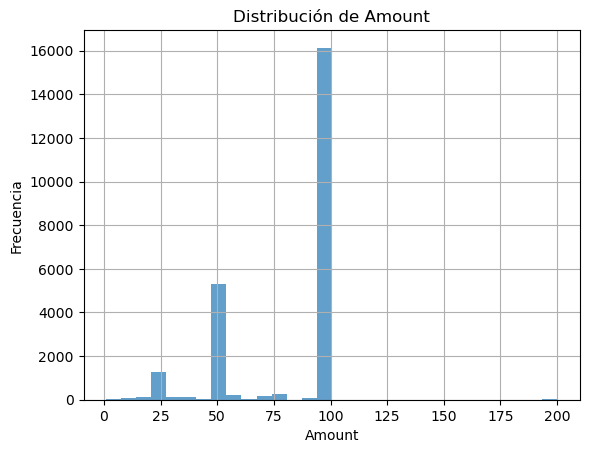

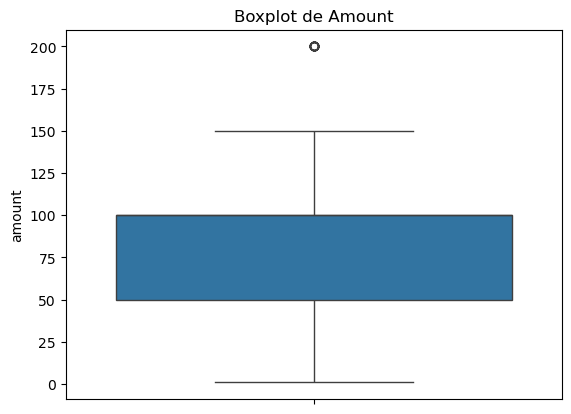

In [102]:
# Estadísticas descriptivas para columnas numéricas
print(datos[['amount', 'user_id', 'deleted_account_id']].describe())

# Histograma para 'amount'
datos['amount'].hist(bins=30, alpha=0.7)
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar outliers
sns.boxplot(data=datos, y='amount')
plt.title('Boxplot de Amount')
plt.show()
#la mayoría de préstamos son de 100 pero hay uno? de 200

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


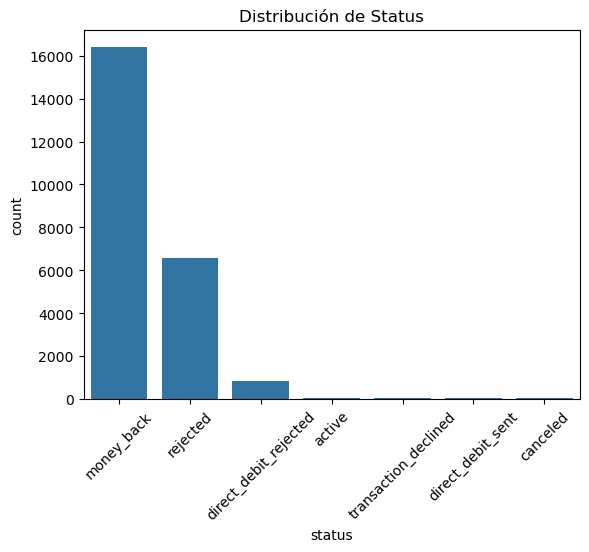

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64


In [104]:
# Conteo de valores únicos para 'status'
print(datos['status'].value_counts())

# Gráfico de barras para 'status'
sns.countplot(data=datos, x='status', order=datos['status'].value_counts().index)
plt.title('Distribución de Status')
plt.xticks(rotation=45)
plt.show()

# Distribución de 'transfer_type'
print(datos['transfer_type'].value_counts())


In [114]:
#relacion entre variables
'''corr = datos[['amount','user_id','deleted_account_id']].corr()
sns.heatmap(corr,annot=True)
plt.title('Matriz correlacion')
plt.show()
'''

KeyError: "None of [Index(['amount', 'user_id', 'deleted_account_id'], dtype='object')] are in the [columns]"

In [4]:
print(datos['created_at'].min(), datos['created_at'].max())

2019-11-19 13:57:53.511561+00:00 2020-11-01 23:42:30.847066+00:00


In [5]:
'''
Dado que ambas columnas están relacionadas y complementan información sobre fechas clave del reembolso, 
podriamos combinarlas en una sola columna para simplificar el análisis.
'''
datos['final_reimbursement_date'] = datos.apply(
    lambda row: row['money_back_date'] if pd.notna(row['money_back_date']) else row['reimbursement_date'],
    axis=1
)

In [98]:

#imputación estratégica:creo que pueden tener relevancia en el análisis, así que imputamos con una nueva categoría ('Desconocido' para categóricos).
#se podrían borrar las columnas si finalmente no aportan nada
'''
datos['deleted_account_id'] = datos['deleted_account_id'].fillna('Desconocido')
datos['reimbursement_date'] = datos['reimbursement_date'].fillna('Desconocido')
datos['recovery_status'] = datos['recovery_status'].fillna('Desconocido')
datos['reco_creation'] = datos['reco_creation'].fillna('Desconocido')
datos['reco_last_update'] = datos['reco_last_update'].fillna('Desconocido')
'''
#columnas con menos nulos

# Porcentaje de valores nulos por columna
nulos = datos.isnull().mean() * 100
print(nulos.sort_values(ascending=False))

# Comprobación de si reimbursement_date y money_back_date son complementarios
reimbursement_no_nulos = datos['reimbursement_date']
money_back_no_nulos = datos['money_back_date']

print("Reimbursement Date (no nulos):")
print(reimbursement_no_nulos)

print("\nMoney Back Date (no nulos):")
print(money_back_no_nulos)

ambas_no_nulas = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
ambas_nulas = datos[datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]

print(f"Ambas columnas no nulas: {len(ambas_no_nulas)}")
print(f"Ambas columnas nulas: {len(ambas_nulas)}")

coinciden = datos[~datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]
fechas_iguales = (coinciden['reimbursement_date'] == coinciden['money_back_date']).sum()

print(f"Coincidencias exactas: {fechas_iguales}")
print(f"Diferencias: {len(coinciden) - fechas_iguales}")

solo_reimbursement = datos[~datos['reimbursement_date'].isna() & datos['money_back_date'].isna()]
solo_money_back = datos[datos['reimbursement_date'].isna() & ~datos['money_back_date'].isna()]

print(f"Solo reimbursement_date tiene datos: {len(solo_reimbursement)}")
print(f"Solo money_back_date tiene datos: {len(solo_money_back)}")

#Comprobar si deleted_account_id y user_id coinciden cuando deleted_account_id no es nulo

deleted_account_id            91.222361
reimbursement_date            87.275761
reco_last_update              86.107635
reco_creation                 86.107635
recovery_status               86.107635
money_back_date               49.770547
final_reimbursement_date      42.052566
moderated_at                  33.617021
cash_request_received_date    32.044222
send_at                       31.305799
user_id                        8.773467
amount                         0.000000
transfer_type                  0.000000
updated_at                     0.000000
created_at                     0.000000
status                         0.000000
id                             0.000000
dtype: float64
Reimbursement Date (no nulos):
0       2020-01-09 19:05:21.596363+00:00
1       2020-01-09 19:50:12.347780+00:00
2       2020-01-09 19:13:35.825041+00:00
3       2020-01-09 19:16:10.879606+00:00
4                                    NaT
                      ...               
23965                       

In [6]:
#definición de cohortes
#obtenemos la primera fecha de cada usuario, agrupamos por user_id y utilizamos el campo 'created_at'
datos['created_at'] = pd.to_datetime(datos['created_at'])
primer_adelanto = datos.groupby('user_id')['created_at'].min().reset_index()
primer_adelanto.rename(columns={'created_at': 'fecha_primer_adelanto'}, inplace=True)



In [7]:
#asignamos cohorte por mes en una columna 'cohorte_mensual'
primer_adelanto['cohorte_mensual'] = primer_adelanto['fecha_primer_adelanto'].dt.to_period('M')
datos_cohortes = datos.merge(primer_adelanto[['user_id', 'cohorte_mensual']], on='user_id', how='left')
print(datos_cohortes[['user_id', 'created_at', 'cohorte_mensual']].head())

   user_id                       created_at cohorte_mensual
0    804.0 2019-12-10 19:05:21.596873+00:00         2019-12
1    231.0 2019-12-10 19:50:12.347780+00:00         2019-12
2    191.0 2019-12-10 19:13:35.825460+00:00         2019-12
3    761.0 2019-12-10 19:16:10.880172+00:00         2019-12
4   7686.0 2020-05-06 09:59:38.877376+00:00         2020-05


C:\Users\chris\AppData\Local\Temp\ipykernel_27888\4096191557.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  primer_adelanto['cohorte_mensual'] = primer_adelanto['fecha_primer_adelanto'].dt.to_period('M')


In [8]:
#mostrar cohortes únicos
cohortes_unicas = sorted(datos_cohortes['cohorte_mensual'].unique())
print(cohortes_unicas)
#vemos que las fechas están dentro del máximo y mínimo de la comprobación anterior min 2019-11 - max 2020-11

[Period('2019-11', 'M'), Period('2019-12', 'M'), Period('2020-05', 'M'), Period('2020-06', 'M'), NaT, Period('2020-01', 'M'), Period('2020-02', 'M'), Period('2020-03', 'M'), Period('2020-04', 'M'), Period('2020-07', 'M'), Period('2020-08', 'M'), Period('2020-09', 'M'), Period('2020-10', 'M'), Period('2020-11', 'M')]


In [9]:
#Una vez definidos los cohortes, podemos comenzar a analizarlos
#Frecuencia de uso
frecuencia_uso_mensual = datos_cohortes.groupby('cohorte_mensual')['user_id'].count().reset_index()
frecuencia_uso_mensual.rename(columns={'user_id': 'frecuencia_uso'}, inplace=True)
print(frecuencia_uso_mensual)



   cohorte_mensual  frecuencia_uso
0          2019-11               8
1          2019-12             893
2          2020-01             321
3          2020-02             423
4          2020-03             323
5          2020-04             840
6          2020-05            1449
7          2020-06            4711
8          2020-07            3735
9          2020-08            1510
10         2020-09            2636
11         2020-10            4943
12         2020-11              75


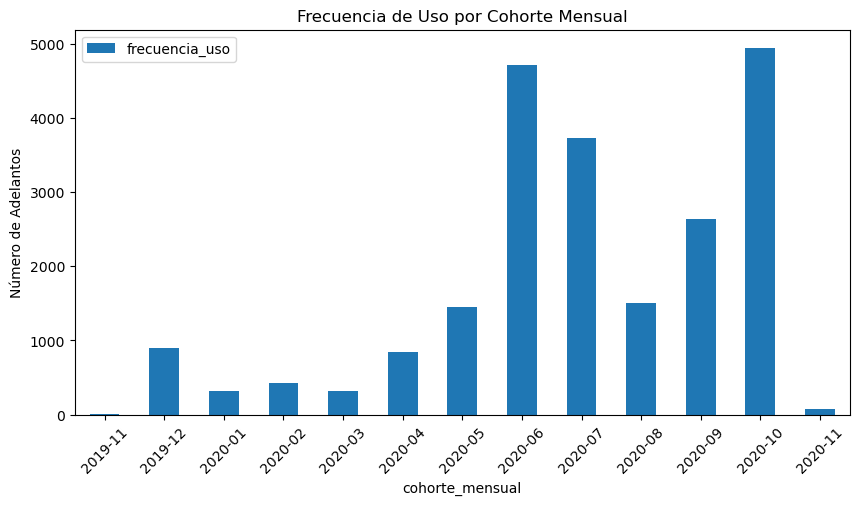

In [10]:
#graficamos
import matplotlib.pyplot as plt
frecuencia_uso_mensual.plot(x='cohorte_mensual', y='frecuencia_uso', kind='bar', figsize=(10, 5))
plt.title('Frecuencia de Uso por Cohorte Mensual')
plt.ylabel('Número de Adelantos')
plt.xlabel('cohorte_mensual')
plt.xticks(rotation=45)
plt.show()

In [11]:
#tasa de incidentes mensuales
incidentes = datos_cohortes[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_mensuales = incidentes.groupby('cohorte_mensual')['user_id'].count() / datos_cohortes.groupby('cohorte_mensual')['user_id'].count()
tasa_incidentes_mensuales = tasa_incidentes_mensuales.reset_index()
tasa_incidentes_mensuales.columns = ['cohorte_mensual', 'tasa_incidentes_mensuales']  # Renombrar columnas
print(tasa_incidentes_mensuales)
#en el cohorte 2019-11 hay una tasa de incidentes nan

   cohorte_mensual  tasa_incidentes_mensuales
0          2019-11                        NaN
1          2019-12                   0.044793
2          2020-01                   0.034268
3          2020-02                   0.021277
4          2020-03                   0.012384
5          2020-04                   0.040476
6          2020-05                   0.026225
7          2020-06                   0.026958
8          2020-07                   0.036680
9          2020-08                   0.029139
10         2020-09                   0.045903
11         2020-10                   0.059680
12         2020-11                   0.040000


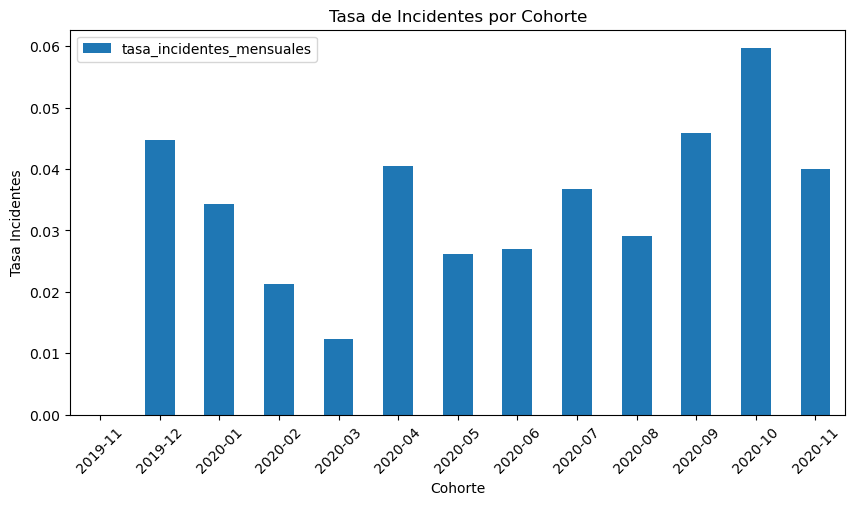

In [12]:
#graficamos
import matplotlib.pyplot as plt
tasa_incidentes_mensuales.plot(x='cohorte_mensual', y='tasa_incidentes_mensuales', kind='bar', figsize=(10, 5))
plt.title('Tasa de Incidentes por Cohorte')
plt.ylabel('Tasa Incidentes')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [13]:
#ingresos generados por cohorte
ingresos_mensuales = datos_cohortes.groupby('cohorte_mensual')['amount'].sum().reset_index()
ingresos_mensuales.rename(columns={'amount': 'ingresos_totales'}, inplace=True)
print(ingresos_mensuales)

   cohorte_mensual  ingresos_totales
0          2019-11             232.0
1          2019-12           84781.0
2          2020-01           31104.0
3          2020-02           39777.0
4          2020-03           31555.0
5          2020-04           79244.0
6          2020-05          134658.0
7          2020-06          425531.0
8          2020-07          320877.0
9          2020-08          116750.0
10         2020-09          196767.0
11         2020-10          340030.0
12         2020-11            5810.0


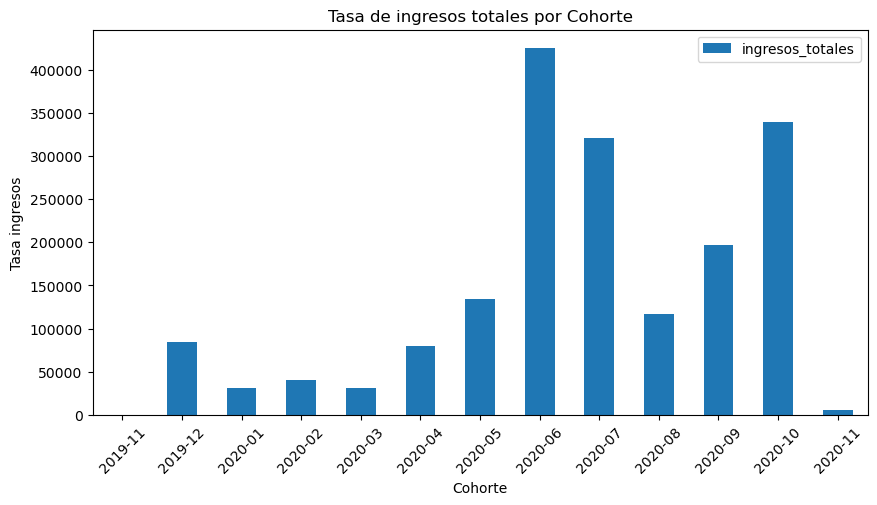

In [14]:
#graficamos
import matplotlib.pyplot as plt
ingresos_mensuales.plot(x='cohorte_mensual', y='ingresos_totales', kind='bar', figsize=(10, 5))
plt.title('Tasa de ingresos totales por Cohorte')
plt.ylabel('Tasa ingresos')
plt.xlabel('Cohorte')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Convertir la cohorte mensual a tipo datetime para convertirla en trimestral
datos_cohortes['fecha_primer_adelanto'] = datos_cohortes['cohorte_mensual'].dt.to_timestamp()

# Convertir a cohorte trimestral
datos_cohortes['cohorte_trimestral'] = datos_cohortes['fecha_primer_adelanto'].dt.to_period('Q')

# Verificar las cohortes trimestrales
cohortes_trimestrales = datos_cohortes[['user_id', 'cohorte_mensual', 'cohorte_trimestral']].drop_duplicates()
print(cohortes_trimestrales)


        user_id cohorte_mensual cohorte_trimestral
0         804.0         2019-12             2019Q4
1         231.0         2019-12             2019Q4
2         191.0         2019-12             2019Q4
3         761.0         2019-12             2019Q4
4        7686.0         2020-05             2020Q2
...         ...             ...                ...
23961   57130.0         2020-09             2020Q3
23962  102737.0         2020-11             2020Q4
23963   31413.0         2020-07             2020Q3
23967   82122.0         2020-10             2020Q4
23968   64517.0         2020-10             2020Q4

[10799 rows x 3 columns]


In [84]:
#Frecuencia de uso trimestral
frecuencia_uso_trimestral = cohortes_trimestrales.groupby('cohorte_trimestral')['user_id'].count().reset_index()
frecuencia_uso_trimestral.rename(columns={'user_id': 'frecuencia_uso_trimestral'}, inplace=True)
print(frecuencia_uso_trimestral.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype        
---  ------                     --------------  -----        
 0   cohorte_trimestral         5 non-null      period[Q-DEC]
 1   frecuencia_uso_trimestral  5 non-null      int64        
dtypes: int64(1), period[Q-DEC](1)
memory usage: 212.0 bytes
None


In [74]:
#Convertimos las columnas de cohortes a datetime para poder graficar
frecuencia_uso_trimestral['cohorte_trimestral'] = frecuencia_uso_trimestral['cohorte_trimestral'].dt.to_timestamp()
frecuencia_uso_mensual['cohorte_mensual'] = frecuencia_uso_mensual['cohorte_mensual'].dt.to_timestamp()

In [78]:
print(frecuencia_uso_trimestral.info())
print(frecuencia_uso_mensual.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cohorte_trimestral         5 non-null      datetime64[ns]
 1   frecuencia_uso_trimestral  5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 212.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cohorte_mensual  13 non-null     datetime64[ns]
 1   frecuencia_uso   13 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 340.0 bytes
None


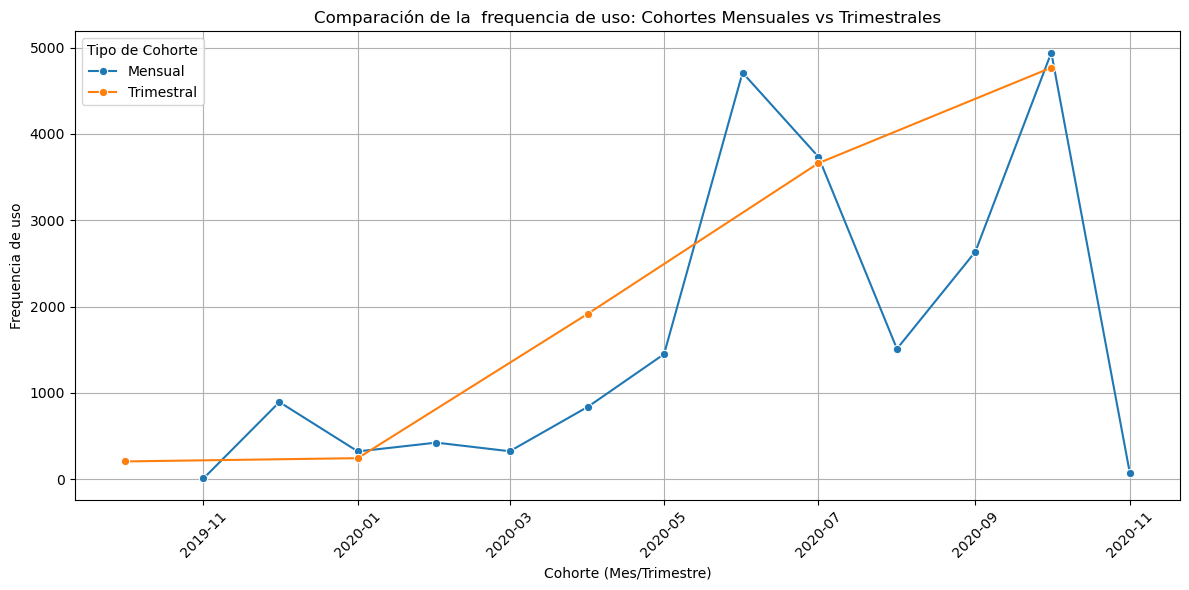

In [82]:
#graficamos frequencia de uso mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='frecuencia_uso', data=frecuencia_uso_mensual, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='frecuencia_uso_trimestral', data=frecuencia_uso_trimestral, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la  frequencia de uso: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Frequencia de uso')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [17]:
#tasa incidentes trimestrales:
#Es 'canceled' una incidencia?
incidentes_trimestrales = cohortes_trimestrales[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]
tasa_incidentes_trimestrales = incidentes_trimestrales.groupby('cohorte_trimestral')['user_id'].count() / datos_cohortes.groupby('cohorte_trimestral')['user_id'].count()
tasa_incidentes_trimestrales = tasa_incidentes_trimestrales.reset_index()
tasa_incidentes_trimestrales.columns = ['cohorte_trimestral', 'tasa_incidentes_trimestrales']  # Renombrar columnas
print(tasa_incidentes_trimestrales)

  cohorte_trimestral  tasa_incidentes_trimestrales
0             2019Q4                      0.016648
1             2020Q1                      0.011246
2             2020Q2                      0.011857
3             2020Q3                      0.023855
4             2020Q4                      0.053607


C:\Users\chris\AppData\Local\Temp\ipykernel_27888\1433028658.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incidentes_trimestrales = cohortes_trimestrales[datos_cohortes['status'].isin(['transaction_declined', 'direct_debit_rejected'])]


In [18]:
#ingresos generados por cohorte trimestral cohortes_trimestrales
ingresos_trimestrales = datos_cohortes.groupby('cohorte_trimestral')['amount'].sum().reset_index()
ingresos_trimestrales.rename(columns={'amount': 'ingresos_totales_trimestrales'}, inplace=True)
print(ingresos_trimestrales)

  cohorte_trimestral  ingresos_totales_trimestrales
0             2019Q4                        85013.0
1             2020Q1                       102436.0
2             2020Q2                       639433.0
3             2020Q3                       634394.0
4             2020Q4                       345840.0


In [86]:
#Convertimos las columnas de cohortes a datetime para poder graficar
ingresos_mensuales['cohorte_mensual'] = ingresos_mensuales['cohorte_mensual'].dt.to_timestamp()


KeyError: 'cohorte_trimestral'

In [90]:
ingresos_trimestrales['cohorte_trimestral'] = ingresos_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [92]:
ingresos_mensuales.info()
ingresos_trimestrales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cohorte_mensual   13 non-null     datetime64[ns]
 1   ingresos_totales  13 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 340.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   cohorte_trimestral             5 non-null      datetime64[ns]
 1   ingresos_totales_trimestrales  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.0 bytes


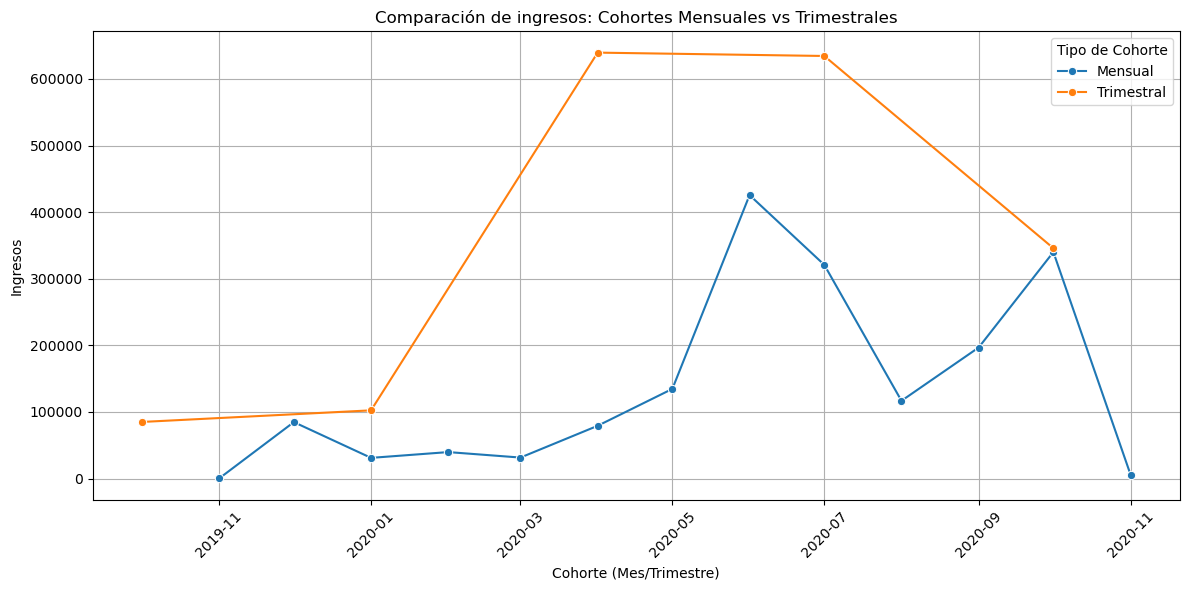

In [96]:
#graficamos ingresos mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='ingresos_totales', data=ingresos_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='ingresos_totales_trimestrales', data=ingresos_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de ingresos: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [52]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_mensuales = tasa_incidentes_mensuales.dropna()
tasa_incidentes_mensuales['cohorte_mensual'] = tasa_incidentes_mensuales['cohorte_mensual'].dt.to_timestamp()

AttributeError: 'DatetimeProperties' object has no attribute 'to_timestamp'

In [56]:
print(tasa_incidentes_mensuales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   cohorte_mensual            12 non-null     datetime64[ns]
 1   tasa_incidentes_mensuales  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 288.0 bytes
None


In [58]:
#Convertimos las columnas de cohortes a datetime para poder graficar
tasa_incidentes_trimestrales['cohorte_trimestral'] = tasa_incidentes_trimestrales['cohorte_trimestral'].dt.to_timestamp()

In [60]:
print(tasa_incidentes_trimestrales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   cohorte_trimestral            5 non-null      datetime64[ns]
 1   tasa_incidentes_trimestrales  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 212.0 bytes
None


In [66]:
'''plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
plt.title('Tasa de Incidentes Mensuales')
plt.xlabel('Cohorte Mensual')
plt.ylabel('Tasa de Incidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
'''

"plt.figure(figsize=(12, 6))\nsns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')\nplt.title('Tasa de Incidentes Mensuales')\nplt.xlabel('Cohorte Mensual')\nplt.ylabel('Tasa de Incidentes')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n"

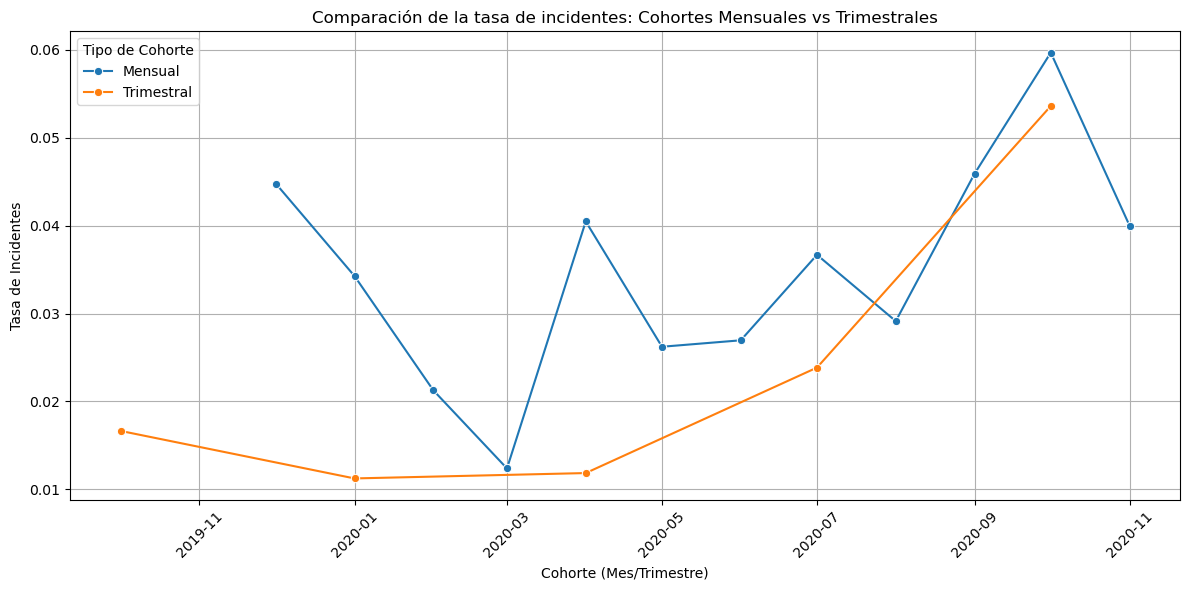

In [64]:
#graficamos tasa incidentes mensual vs trimestral
plt.figure(figsize=(12, 6))
sns.lineplot(x='cohorte_mensual', y='tasa_incidentes_mensuales', data=tasa_incidentes_mensuales, label='Mensual', marker='o')
sns.lineplot(x='cohorte_trimestral', y='tasa_incidentes_trimestrales', data=tasa_incidentes_trimestrales, label='Trimestral', marker='o')

# Configuración del gráfico
plt.title('Comparación de la tasa de incidentes: Cohortes Mensuales vs Trimestrales')
plt.xlabel('Cohorte (Mes/Trimestre)')
plt.ylabel('Tasa de Incidentes')
plt.legend(title='Tipo de Cohorte')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [ ]:
#Métricas acumuladas
#Tasa acumulada de incidentes


In [106]:
# archivo extractfees.csv
ruta_archivo = './extractfees.csv'
datos = pd.read_csv(ruta_archivo)
# Muestra información básica sobre el DataFrame
print(datos.info())
# Estadísticas descriptivas iniciales para columnas numéricas
print(datos.describe())
# Lista de columnas del DataFrame
print(datos.columns)
# Muestra las primeras y últimas filas para inspección inicial
#print(datos.head())
#print(datos.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
                 id  cash_request_id  total_amount
count  21061.000000     21057.000000  21061.000000
mean   10645.355111     16318.4